In [1]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

In [2]:
# to import data
df=pd.read_csv("C:/Users/atef1/OneDrive/Desktop/section2/walmart-sales-dataset-of-45stores.csv")
# to display data's head and tail
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## to display all data
### we write --->   print(df.to_string())

In [3]:
print(df.info())# for more information about data like data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


## i will convert Date coulmn to data type datetime 

In [4]:
# Convert type of Date column From object to DateTime
df['Date']=pd.to_datetime(df['Date'],format='mixed')
df['Date']

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [5]:
df.describe() # for some statical describe to data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 20:18:27.692307712,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-12 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-03-02 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


## seems there is some outliers in data 
### so we need to check this data and do per-processing and perform data cleaning

In [6]:
#checke for null values -->
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### so empty values are not exist

In [7]:
#checke for duplicated coulnms -->
df.duplicated().any()

False

### so duplicated values are not exist

### before we check outliers i will convert the temperature from F to C

In [8]:
# Convert 'Temperature' column to Celsius as'Temperatuer_C'
df['Temperature_C'] = (df['Temperature'] - 32) * 5/9

# Drop the original 'Temperature' column if you don't need it anymore
df.drop(columns=['Temperature'], inplace=True)

print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Fuel_Price         CPI  \
0         1 2010-05-02    1643690.90             0       2.572  211.096358   
1         1 2010-12-02    1641957.44             1       2.548  211.242170   
2         1 2010-02-19    1611968.17             0       2.514  211.289143   
3         1 2010-02-26    1409727.59             0       2.561  211.319643   
4         1 2010-05-03    1554806.68             0       2.625  211.350143   
...     ...        ...           ...           ...         ...         ...   
6430     45 2012-09-28     713173.95             0       3.997  192.013558   
6431     45 2012-05-10     733455.07             0       3.985  192.170412   
6432     45 2012-12-10     734464.36             0       4.000  192.327265   
6433     45 2012-10-19     718125.53             0       3.969  192.330854   
6434     45 2012-10-26     760281.43             0       3.882  192.308899   

      Unemployment  Temperature_C  
0            8.106       5.

In [9]:
#checke for outliers buy using boxplot  -->
from IPython.display import Image
# spacify the image URL or lacal file path
Image (url='boxplot.png')

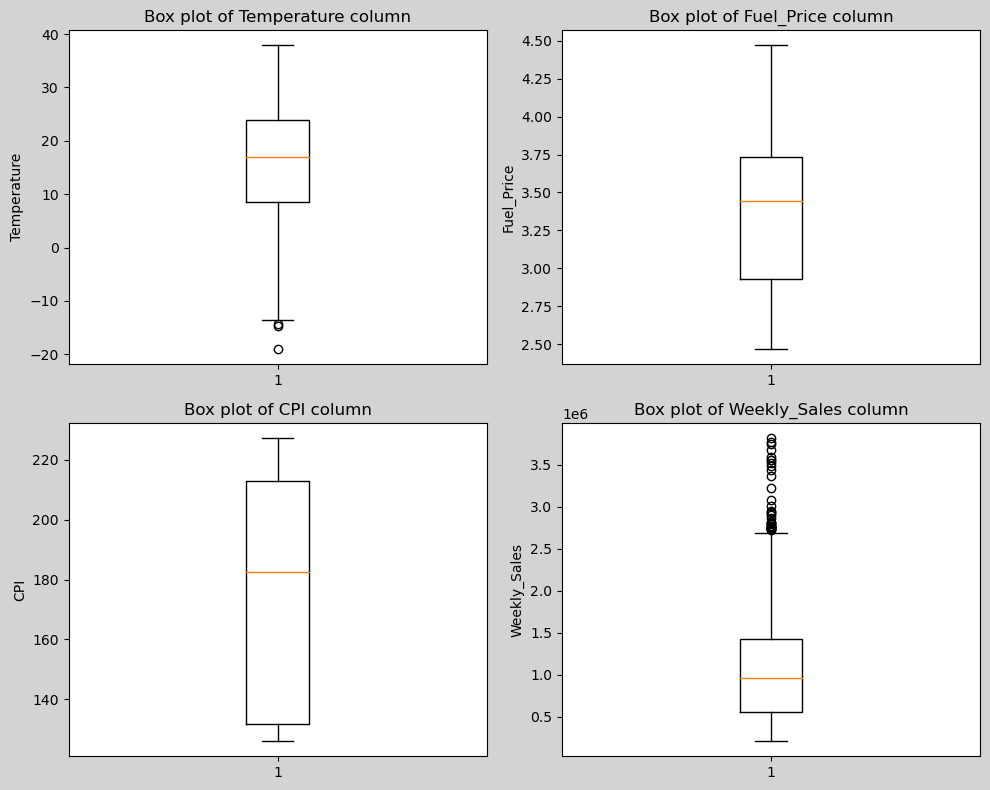

In [10]:
# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.set_facecolor('lightgrey')
# Create a box plot to chcke for outliers in Weekly_Sales column.

axs[0, 0].boxplot(df['Temperature_C'])
axs[0, 0].set_title('Box plot of Temperature column')
axs[0, 0].set_ylabel('Temperature')

# Create a box plot to chcke for outliers in Weekly_Sales column.

axs[0, 1].boxplot(df['Fuel_Price'])
axs[0, 1].set_title('Box plot of Fuel_Price column')
axs[0, 1].set_ylabel('Fuel_Price')
# Create a box plot to chcke for outliers in Weekly_Sales column.

axs[1, 0].boxplot(df['CPI'])
axs[1, 0].set_title('Box plot of CPI column')
axs[1, 0].set_ylabel('CPI')
# Create a box plot to chcke for outliers in Weekly_Sales column.

axs[1, 1].boxplot(df['Weekly_Sales'])
axs[1, 1].set_title('Box plot of Weekly_Sales column')
axs[1, 1].set_ylabel('Weekly_Sales')
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### there is some outliers in temperatuer column
### and there is alot outliers in Weekly_Sales column

<Axes: xlabel='Temperature_C'>

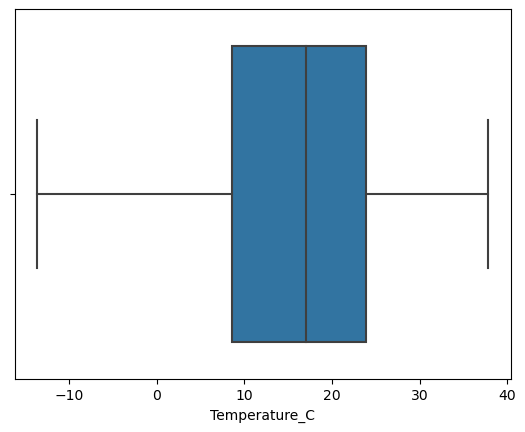

In [11]:
sns.boxplot(x='Temperature_C', data=df, showfliers=False)


In [12]:
# Filter out rows where 'Temperature' falls within the specified range
#df = df[(df['Temperature_C'] > 0) ]
# I may not remove outliers in Weekly_Sales because it may effect in data, but I will remove it anyway to make analysis more effective  
#df = df[(df['Weekly_Sales'] < 2.518686e+06) ]

print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Fuel_Price         CPI  \
0         1 2010-05-02    1643690.90             0       2.572  211.096358   
1         1 2010-12-02    1641957.44             1       2.548  211.242170   
2         1 2010-02-19    1611968.17             0       2.514  211.289143   
3         1 2010-02-26    1409727.59             0       2.561  211.319643   
4         1 2010-05-03    1554806.68             0       2.625  211.350143   
...     ...        ...           ...           ...         ...         ...   
6430     45 2012-09-28     713173.95             0       3.997  192.013558   
6431     45 2012-05-10     733455.07             0       3.985  192.170412   
6432     45 2012-12-10     734464.36             0       4.000  192.327265   
6433     45 2012-10-19     718125.53             0       3.969  192.330854   
6434     45 2012-10-26     760281.43             0       3.882  192.308899   

      Unemployment  Temperature_C  
0            8.106       5.

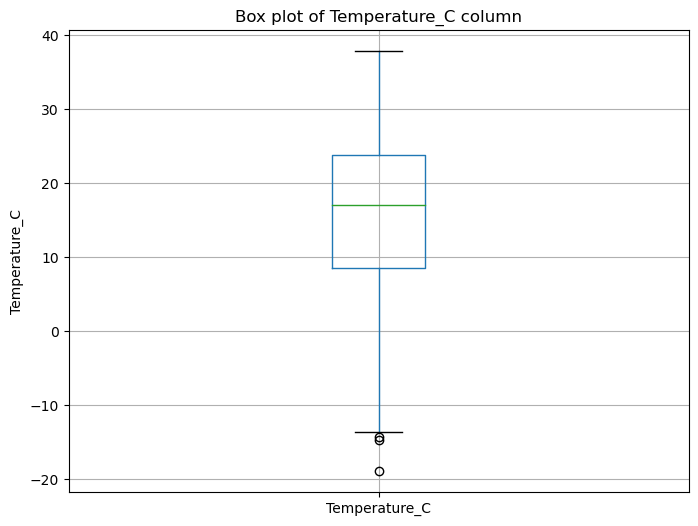

In [13]:
# Create a box plot to chcke for outliers in Temperature column.
plt.figure(figsize=(8, 6))
df.boxplot(column='Temperature_C')
plt.title('Box plot of Temperature_C column')
plt.ylabel('Temperature_C')
plt.show()

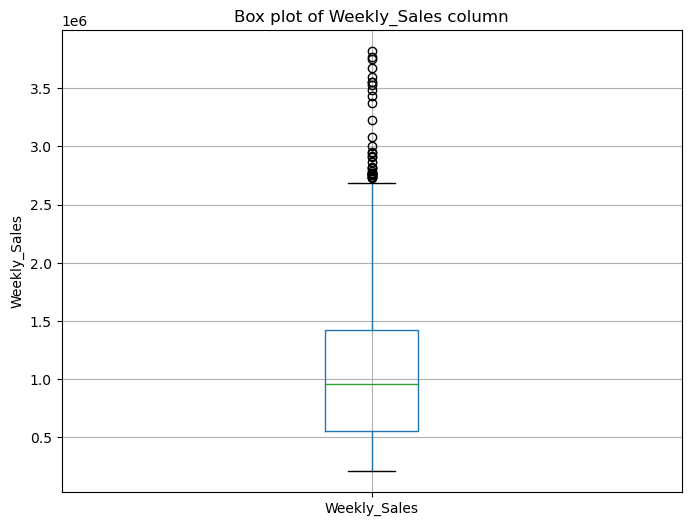

In [14]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Weekly_Sales')
plt.title('Box plot of Weekly_Sales column')
plt.ylabel('Weekly_Sales')
plt.show()

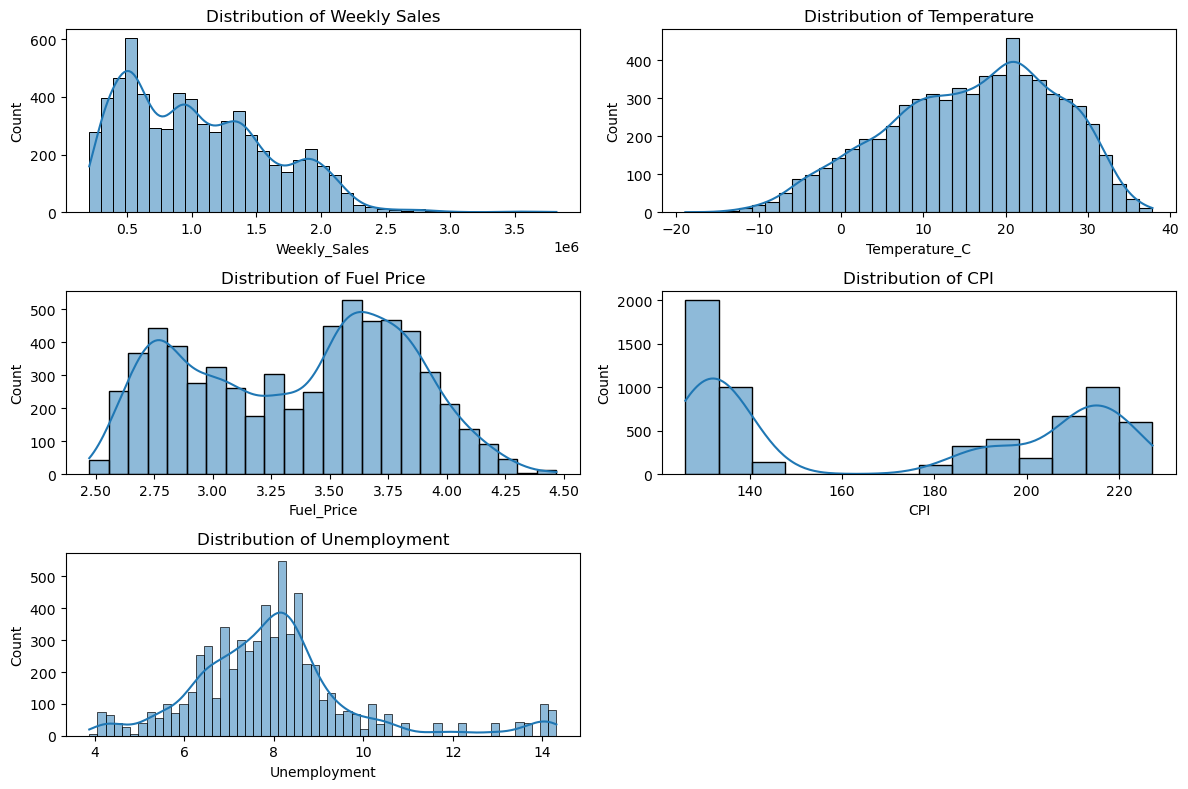

In [15]:
# to visualize quantitative variables distributions I choose Plot histograms
# Plot histograms for quantitative variables
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly Sales')

plt.subplot(3, 2, 2)
sns.histplot(df['Temperature_C'], kde=True)
plt.title('Distribution of Temperature')

plt.subplot(3, 2, 3)
sns.histplot(df['Fuel_Price'], kde=True)
plt.title('Distribution of Fuel Price')

plt.subplot(3, 2, 4)
sns.histplot(df['CPI'], kde=True)
plt.title('Distribution of CPI')

plt.subplot(3, 2, 5)
sns.histplot(df['Unemployment'], kde=True)
plt.title('Distribution of Unemployment')

plt.tight_layout()
plt.show()

 # to Answer the project's questions

## store has maximum sales

In [16]:

df2 = df.groupby('Store')['Weekly_Sales'].sum().to_frame().reset_index()
max_sales_store = df2[df2['Weekly_Sales'] == df2['Weekly_Sales'].max()]
print('Store with maximum sales:')
print(max_sales_store)
df2


Store with maximum sales:
    Store  Weekly_Sales
19     20  3.013978e+08


,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


<function matplotlib.pyplot.show(close=None, block=None)>

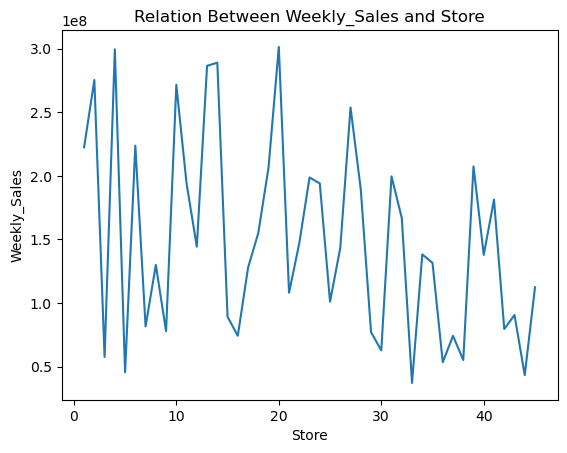

In [17]:
plt.plot(df2['Store'],df2['Weekly_Sales'])
plt.title('Relation Between Weekly_Sales and Store')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show

## FOR store has maximum standard deviation question


In [18]:
std_dev_sales_per_store = df.groupby('Store')['Weekly_Sales'].std()

# Find the store with the maximum standard deviation
max_std_dev_store = std_dev_sales_per_store.idxmax()
max_std_dev_value = std_dev_sales_per_store.max()

print(f"Store with maximum standard deviation of sales is store {max_std_dev_store} with standard deviation of {max_std_dev_value}")


Store with maximum standard deviation of sales is store 14 with standard deviation of 317569.9494755081


## Calculate the mean of non-holiday 'Weekly_Sales' column where 'Store' equals 0


In [19]:
non_holiday_mean = df.loc[df['Holiday_Flag'] == 0, 'Weekly_Sales'].mean()

print(f"Mean weekly sales for non-holiday is {non_holiday_mean}")

Mean weekly sales for non-holiday is 1041256.3802088555


In [20]:
# Calculate the mean of 'Weekly_Sales' for non-holiday days

# Filter the DataFrame for holiday days and then check if 'Weekly_Sales' is greater than non_holiday_mean
holiday_sales = df.loc[df['Holiday_Flag'] == 1]
holiday_sales_above_mean = holiday_sales[holiday_sales['Weekly_Sales'] > non_holiday_mean]

# Print the 'Date' column for holiday days where 'Weekly_Sales' is above the non-holiday mean
higher_sales_Date=holiday_sales_above_mean['Date'].unique()
print(higher_sales_Date)


<DatetimeArray>
['2010-12-02 00:00:00', '2010-10-09 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-11-02 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-10-02 00:00:00',
 '2012-07-09 00:00:00']
Length: 10, dtype: datetime64[ns]


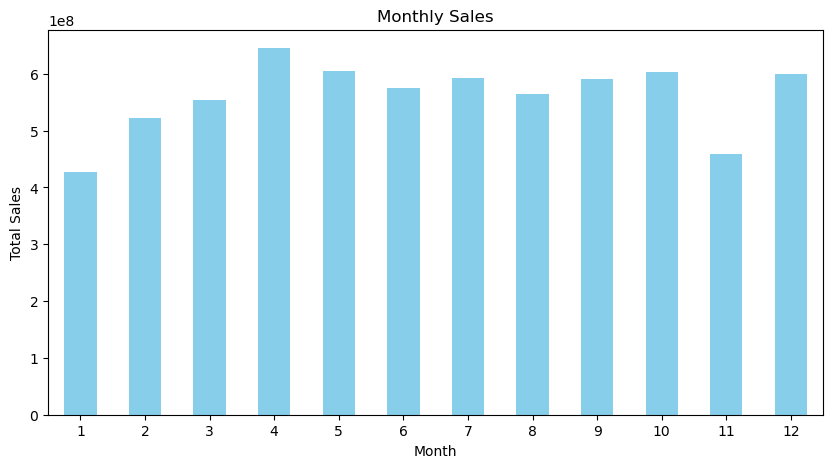

Total sales: 6737218987.11
Average monthly sales: 561434915.5925001
Average semesterly sales: 1684304746.7775002


In [21]:
# Extract month and semester from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Semester'] = df['Date'].dt.quarter
#df['Semester'] = (df['Month']-1)//6+1


# Aggregate sales by month
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()

# Aggregate sales by semester
semesterly_sales = df.groupby('Semester')['Weekly_Sales'].sum()
# Plot monthly sales
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

# Plot semesterly sales
#plt.figure(figsize=(6, 4))
#semesterly_sales.plot(kind='bar', color='lightgreen')
#plt.title('Semesterly Sales')
#plt.xlabel('Semester')
#plt.ylabel('Total Sales')
#plt.xticks(rotation=0)
#plt.show()

# Insights
total_sales = df['Weekly_Sales'].sum()
average_monthly_sales = monthly_sales.mean()
average_semesterly_sales = semesterly_sales.mean()

print(f"Total sales: {total_sales}")
print(f"Average monthly sales: {average_monthly_sales}")
print(f"Average semesterly sales: {average_semesterly_sales}")

In [1]:
df['Year'] = df['Date'].dt.year

# Group by year and month, summing up the weekly sales
grouped = df.groupby(['Year', 'Month']).agg({'Weekly_Sales': 'sum'}).reset_index()

# Plot
fig, ax = plt.subplots(figsize=(20, 12))
colors = ['b', 'g', 'r', 'c', 'm']  # Different colors for each year

for i, (year, group) in enumerate(grouped.groupby('Year')):
    group.plot(kind='bar', x='Month', y='Weekly_Sales', color=colors[i], ax=ax, position=i, width=0.2, label=year)

ax.set_ylabel('Weekly Sales')
ax.set_xlabel('Month')
ax.set_title('Weekly Sales by Month and Year to show semesterly sales')
ax.legend(title='Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

## to Plot the relations between weekly sales vs. other numeric features and giving insights.

<function matplotlib.pyplot.show(close=None, block=None)>

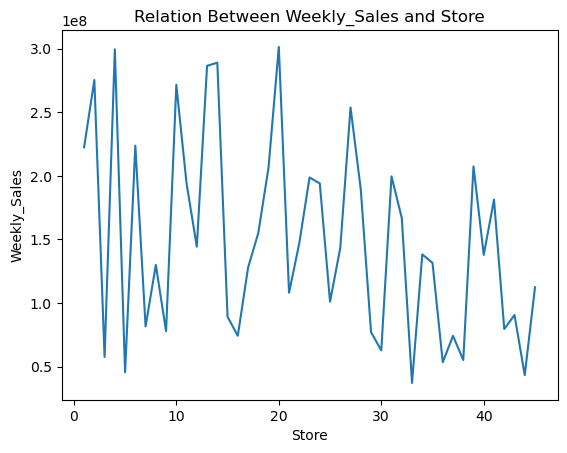

In [23]:
plt.plot(df2['Store'],df2['Weekly_Sales'])
plt.title('Relation Between Weekly_Sales and Store')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

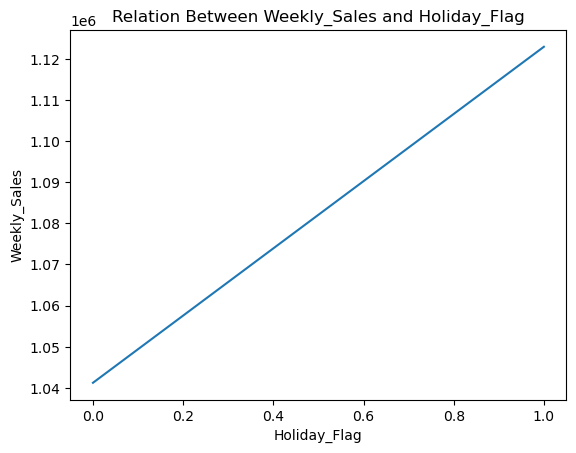

In [24]:
df5=df.groupby('Holiday_Flag')['Weekly_Sales'].mean().to_frame().reset_index()
df5
plt.plot(df5['Holiday_Flag'],df5['Weekly_Sales'])
plt.title('Relation Between Weekly_Sales and Holiday_Flag')
plt.xlabel('Holiday_Flag')
plt.ylabel('Weekly_Sales')
plt.show

In [25]:
# that show that weekly sales incressed in holidays

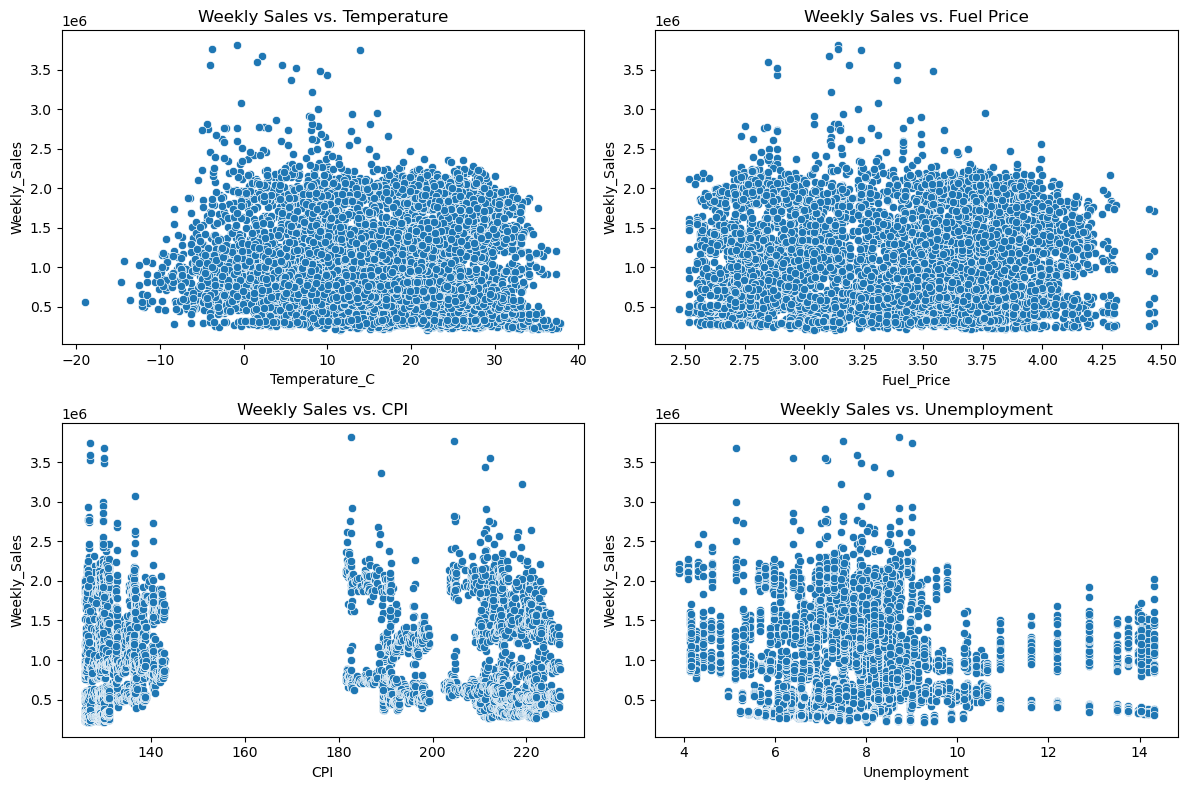

In [26]:

# Plot relations between weekly sales and other numeric features
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Temperature_C', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Temperature')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Fuel Price')

plt.subplot(2, 2, 3)
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. CPI')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Unemployment')

plt.tight_layout()
plt.show()



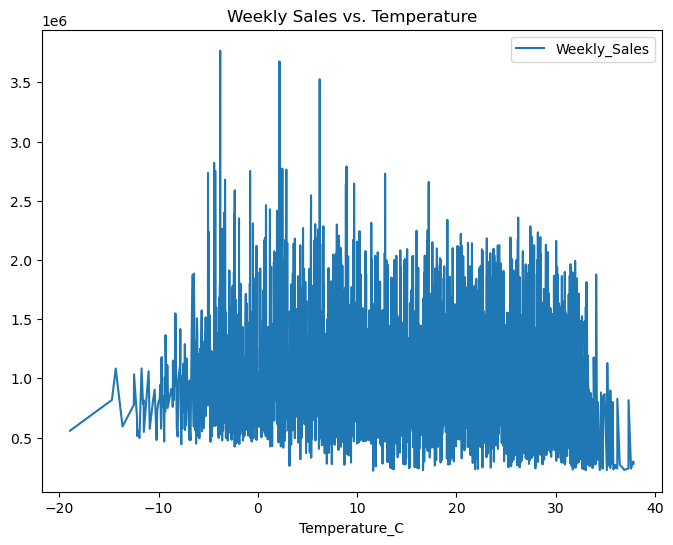

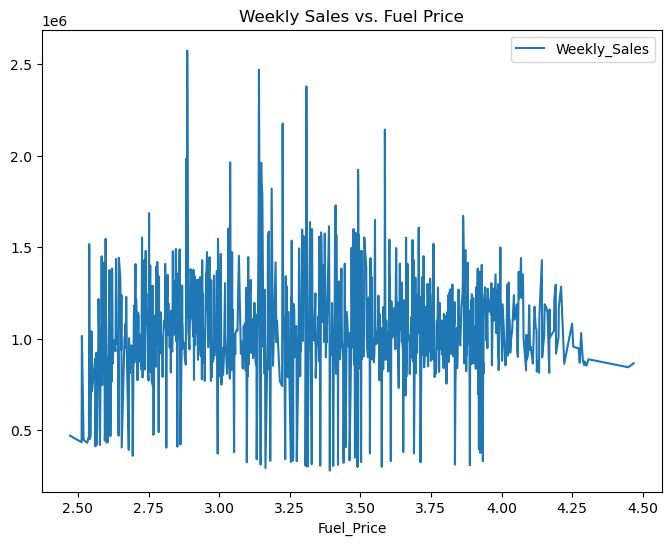

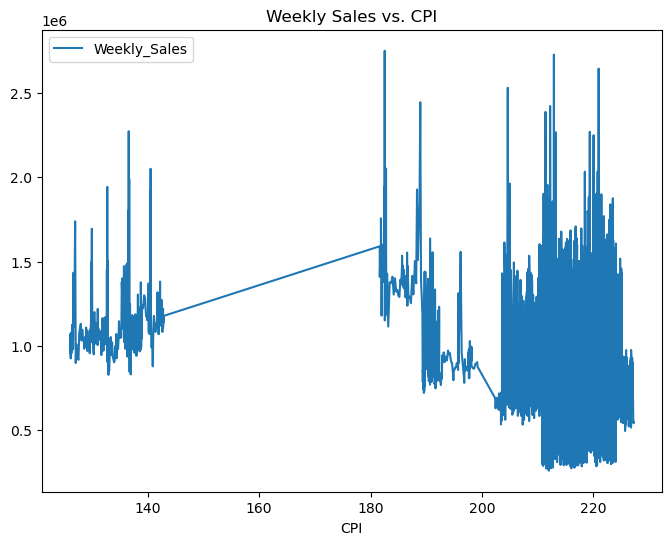

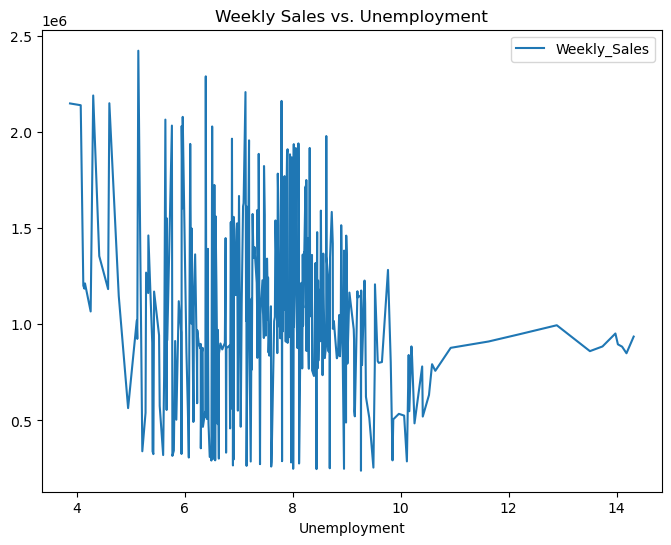

In [27]:
# Plot relations between weekly sales and other numeric features
df2=df.groupby('Temperature_C')['Weekly_Sales'].mean().to_frame().reset_index()
df2.plot(x='Temperature_C', y='Weekly_Sales', kind='line', title='Weekly Sales vs. Temperature', figsize=(8, 6))

df2=df.groupby('Fuel_Price')['Weekly_Sales'].mean().to_frame().reset_index()
df2.plot(x='Fuel_Price', y='Weekly_Sales', kind='line', title='Weekly Sales vs. Fuel Price', figsize=(8, 6))

df2=df.groupby('CPI')['Weekly_Sales'].mean().to_frame().reset_index()
df2.plot(x='CPI', y='Weekly_Sales', kind='line', title='Weekly Sales vs. CPI', figsize=(8, 6))

df2=df.groupby('Unemployment')['Weekly_Sales'].mean().to_frame().reset_index()
df2.plot(x='Unemployment', y='Weekly_Sales', kind='line', title='Weekly Sales vs. Unemployment', figsize=(8, 6))

plt.show()

### from the last visualization we can conclude that
### there is weak relation between weekly sales and (temperature and fuel price)
### weekly sales rate has been dropped at CPI between (150 to 170)
### weekly sales rate has been dropped at Unemployment more than 10


In [28]:
df4=df.drop('Date',axis=1)
df4=df4.drop('Holiday_Flag',axis=1)
df4=df4.drop('Semester',axis=1)
df4=df4.drop('Month',axis=1)

df4

,Store,Weekly_Sales,Fuel_Price,CPI,Unemployment,Temperature_C,Year
0,1,1643690.90,2.572,211.096358,8.106,5.727778,2010
1,1,1641957.44,2.548,211.242170,8.106,3.616667,2010
2,1,1611968.17,2.514,211.289143,8.106,4.405556,2010
3,1,1409727.59,2.561,211.319643,8.106,8.127778,2010
4,1,1554806.68,2.625,211.350143,8.106,8.055556,2010
...,...,...,...,...,...,...,...
6430,45,713173.95,3.997,192.013558,8.684,18.266667,2012
6431,45,733455.07,3.985,192.170412,8.667,18.272222,2012
6432,45,734464.36,4.000,192.327265,8.667,12.483333,2012
6433,45,718125.53,3.969,192.330854,8.667,13.594444,2012


### FOR Visualizing Relationships
### I will use pairplot function in Seaborn, pairplot is a function that creates a grid of pairwise plots for the numeric variables in a DataFrame.


C:\Users\atef1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


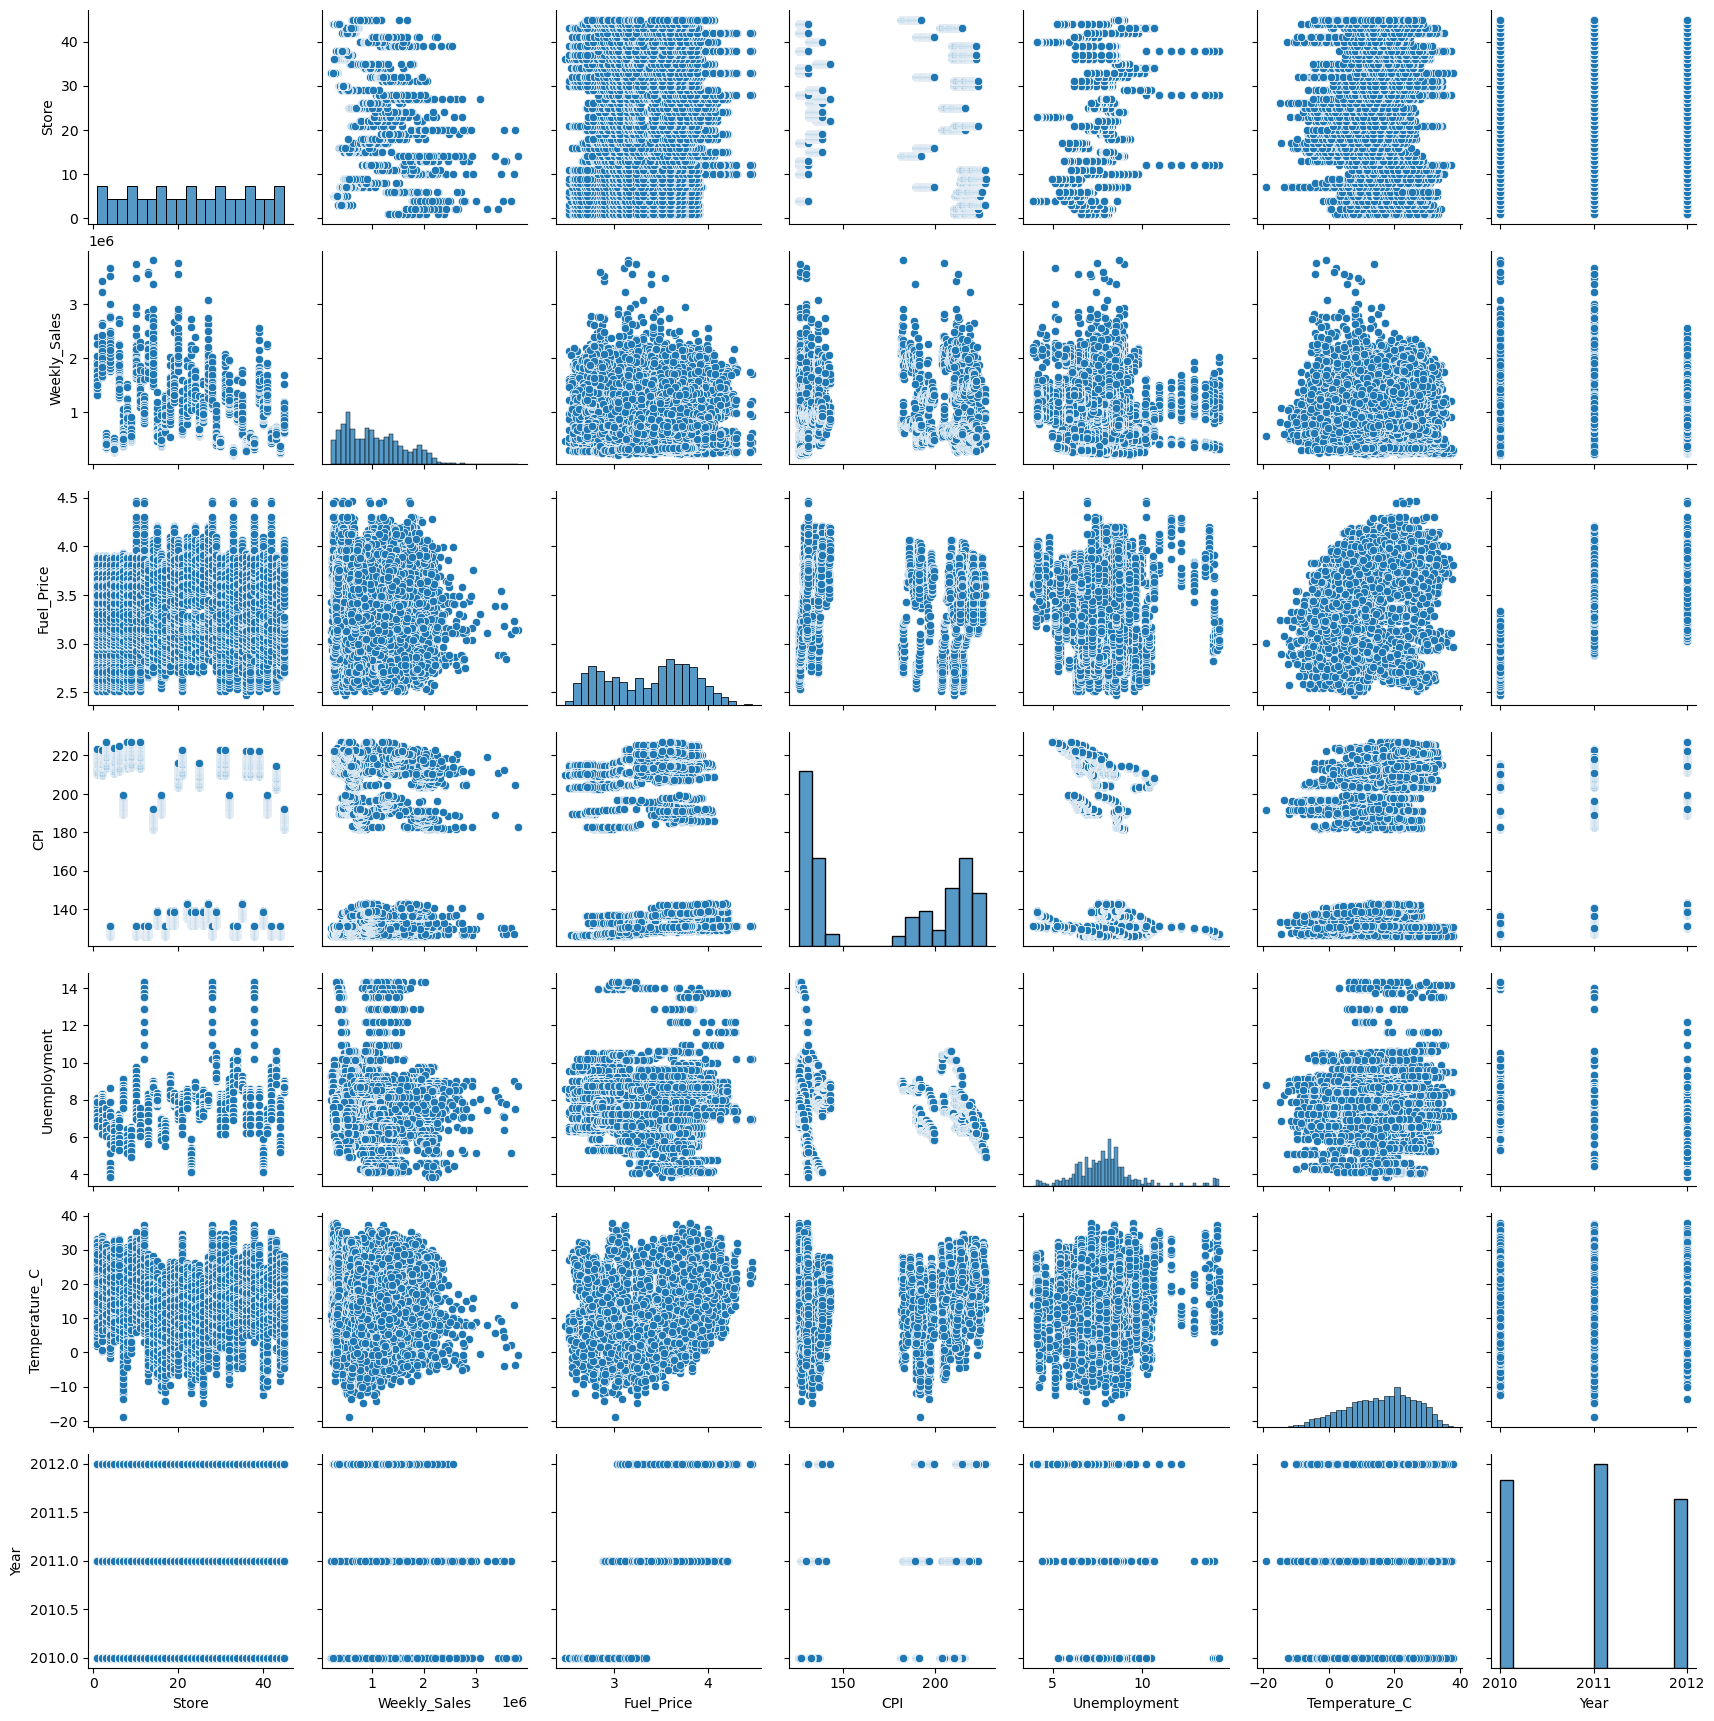

In [29]:
sns.pairplot(df4)
plt.show()